In [1]:
%matplotlib inline
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = np.array([ [1,2],[1,4],[1,0],[4,2],[4,4],[4,0] ])
kmeans = KMeans(n_clusters=2,random_state=0).fit(X)
kmeans.cluster_centers_

array([[1., 2.],
       [4., 2.]])

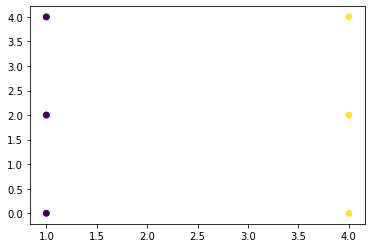

In [6]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)

In [8]:
nx = np.array([[0,0],[4,3]])
kmeans.predict(nx)

array([0, 1])

In [9]:
#another code
from sklearn.datasets import make_blobs

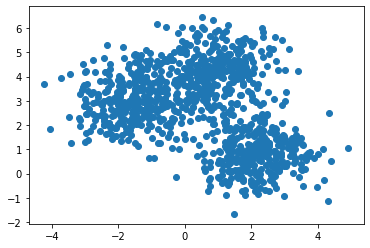

In [11]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=0,cluster_std=0.9)
plt.scatter(X[:,0],X[:,1])

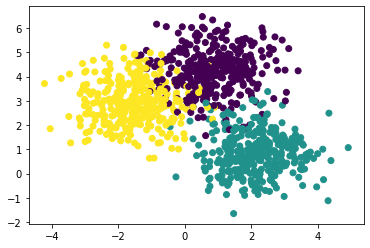

In [12]:
plt.scatter(X[:,0],X[:,1],c=y)

In [13]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(X)

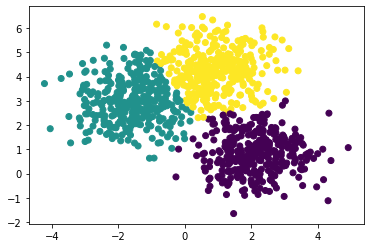

In [14]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)

In [15]:
nx = np.array([[0,0],[4,3],[0,4]])
predict = kmeans.predict(nx)
predict

array([0, 0, 2])

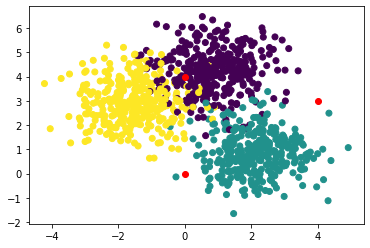

In [17]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(nx[:,0],nx[:,1],c='r')

In [19]:
#ejemplo nominas jalisco
import pandas as pd

In [20]:
NominasList = ["NominaJalisco/nomina_0_3000.csv",
              "NominaJalisco/nomina_10001_.csv",
              "NominaJalisco/nomina_3001_4000.csv",
              "NominaJalisco/nomina_4001_4500.csv",
              "NominaJalisco/nomina_4901_4999.csv",
              "NominaJalisco/nomina_5001_7000.csv",
              "NominaJalisco/nomina_7000_10000.csv"]

In [21]:
names = ["Nombre","Dependencia","Puesto","Percepciones", "Deducciones", "Neto"]
mi_df = lambda x: pd.read_csv(x,usecols = [1,2,3,6,7,8], names=names, header=None, skiprows=2)

df_from_each_file = (mi_df(f) for f in NominasList)
nomina = pd.concat(df_from_each_file, ignore_index=True)

In [23]:
nomina.dtypes

Nombre           object
Dependencia      object
Puesto           object
Percepciones    float64
Deducciones     float64
Neto            float64
dtype: object

In [24]:
nomina.describe()

,Percepciones,Deducciones,Neto
count,14002.000000,14002.000000,14002.000000
mean,9783.054558,4234.217962,5548.836601
std,13220.238007,5033.317698,9944.088694
min,-8149.380000,-8149.380000,0.000000
25%,6872.050000,1995.210000,2746.125000
50%,8362.500000,3581.155000,4639.750000
75%,9251.000000,5566.185000,6367.290000
max,791424.940000,324292.100000,770100.000000


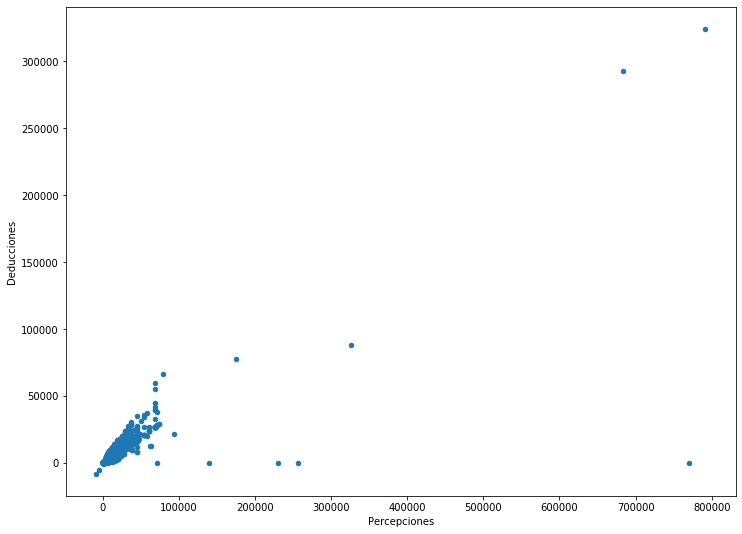

In [25]:
nomina.plot.scatter("Percepciones","Deducciones", figsize=(12,9));

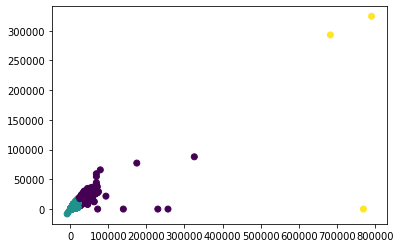

In [59]:
X,y = nomina["Percepciones"].values, nomina["Deducciones"].values
kmeans = KMeans(n_clusters=3,random_state=0).fit(X.reshape(-1,1))
plt.scatter(X,y,c=kmeans.labels_)

In [68]:
X = nomina[ ["Percepciones","Deducciones"] ].values.reshape(-1,2)
k_means = KMeans(n_clusters=2).fit(X)

centroides = k_means.cluster_centers_
etiquetas = k_means.labels_
centroides,etiquetas

(array([[  9624.7906579 ,   4191.04013358],
        [748295.16666667, 205716.35666667]]), array([0, 0, 0, ..., 0, 0, 0]))

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

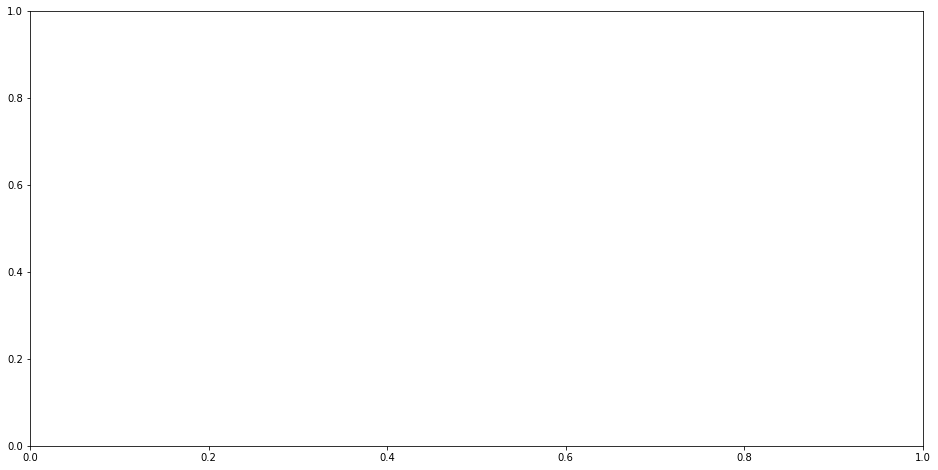

In [66]:
color = ['r' if x else 'g' for x in etiquetas]
nomina.plot.scatter("Percepciones", "Deducciones", figsize=(12,9),c=color)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K,distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title("blablabla")
plt.show()